Use 3C263 as example here.  It has non-SDSS wavelength resolution, high S2N, and coverage at 2500Å, so it be a good object for solely testing the rebin implementation.

In [1]:
from astropy.io import fits
import sys
sys.path.append("/Users/trevormccaffrey/Dropbox/ICA_module/code_main/")
#sys.path.append("/Users/Trevor1/Dropbox/ICA_module/")
import run_ICA_r20_components
sys.path.append("/Users/trevormccaffrey/Dropbox/HST/HSTCode/")
import Cut_Edge_Pix_TVM
import Small_Pix_Filter_TVM
import spec_morph
import plot_ICA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import weightedstats as ws

In [2]:
def arg2min(arr):
    #return index of second closest point
    return np.argsort(arr)[1]

In [3]:
spec_path = "/Users/trevormccaffrey/Dropbox/HST/Sulentic_spectra/SulenticAllData/FOS/3C263/"

In [4]:
dat1 = pd.read_csv(spec_path+"NecessaryParams.csv")

In [5]:
dat1

,filters,obs_id
0,G190H,y0pe0902t
1,G270H,y0pe0903t
2,G400H,y0pe0904t
3,G190H,y0rv1h03t
4,G270H,y0rv1h04t


In [6]:
!ls -l /Users/Trevor1/Dropbox/HST/Sulentic_spectra/SulenticAllData/FOS/3C263/y0pe0902t

ls: /Users/Trevor1/Dropbox/HST/Sulentic_spectra/SulenticAllData/FOS/3C263/y0pe0902t: No such file or directory


In [7]:
z = 0.6465

wave = np.flip(fits.open(spec_path+'y0pe0903t/y0pe0903t_c0f.fits')[0].data[0,:]) #/ (1+z)
flux = np.flip(fits.open(spec_path+'y0pe0903t/y0pe0903t_c1f.fits')[0].data[0,:])
errs = np.flip(fits.open(spec_path+'y0pe0903t/y0pe0903t_c2f.fits')[0].data[0,:])
mask = np.flip(fits.open(spec_path+'y0pe0903t/y0pe0903t_cqf.fits')[0].data[0,:])

(0.0, 1.618445698300746e-14)

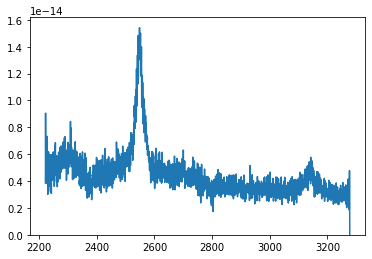

In [8]:
plt.plot(wave, flux)
plt.ylim(0,None)

In [9]:
wave_arb, \
flux_arb, \
errs_arb, \
mask_arb, \
wave_ica, \
flux_ica, \
f2500_ica = run_ICA_r20_components.main_ICA(wave/(1+z), flux, errs, mask, z, name="", 
                                           ica_path="/Users/trevormccaffrey/Dropbox/ICA_module/components/")

Input wavelength resolution does not match 69 km/s.  Re-binning spectrum.


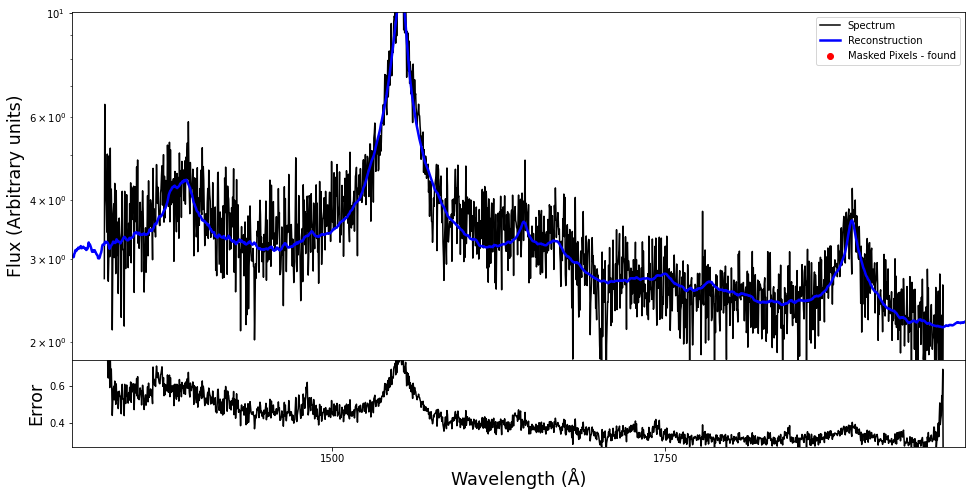

In [10]:
plot_ICA.spec_wreconstruction(wave_arb, flux_arb, errs_arb, mask_arb, wave_ica, flux_ica)

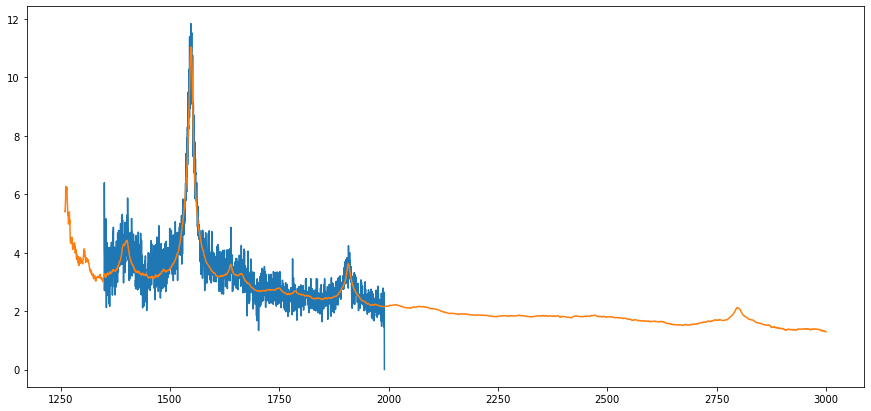

In [11]:
fig = plt.figure(figsize=(15,7))
plt.plot(wave_arb, flux_arb)
plt.plot(wave_ica, flux_ica)
plt.show()

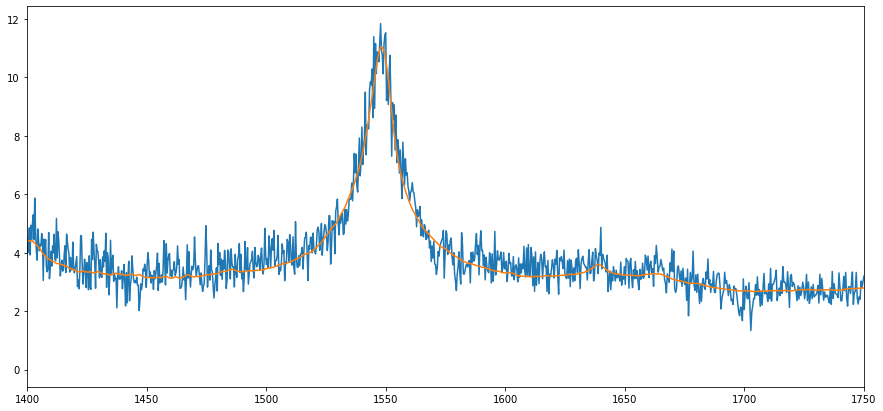

In [12]:
fig = plt.figure(figsize=(15,7))
plt.plot(wave_arb, flux_arb)
plt.plot(wave_ica, flux_ica)
plt.xlim(1400,1750)
plt.show()

In [13]:
wave, flux

(array([2222.2852, 2222.7996, 2223.314 , ..., 3276.2104, 3276.7217,
        3277.233 ], dtype=float32),
 array([3.8596882e-15, 9.0542164e-15, 6.4485855e-15, ..., 4.7754282e-15,
        2.5055554e-15, 0.0000000e+00], dtype=float32))

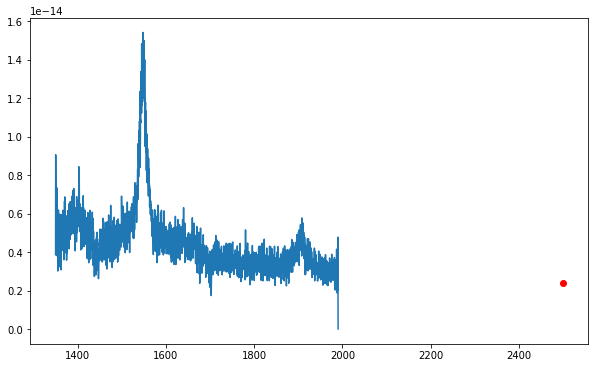

In [14]:
fig = plt.figure(figsize=(10,6))
plt.plot(wave/(1+z), flux)
plt.scatter(2500., f2500_ica, color="r")
plt.show()

In [15]:
f2500_ica

2.393776042775623e-15